In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv("mushrooms.csv")

In [3]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [4]:
len(df.index)

8124

In [5]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<BarContainer object of 2 artists>

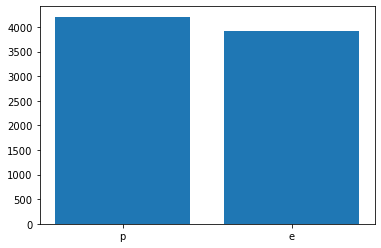

In [6]:
plt.bar(df['class'].unique(), df['class'].value_counts().values)

In [7]:
predictors = df.drop(columns=['class'])
target = df['class']

In [8]:
encoder = preprocessing.LabelEncoder()

for i in predictors.columns:
  predictors[i] = encoder.fit_transform(predictors[i])

target = encoder.fit_transform(target)

In [9]:
predictors.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [10]:
target[:5]

array([1, 0, 0, 1, 0])

In [11]:
x_train, x_test, y_train, y_test = train_test_split(predictors, target, train_size=0.8, random_state=271)

In [12]:
model = LogisticRegression(random_state=271, max_iter=500)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print('Предсказанные значения:\t', y_predict[:10])
print('Исходные значения\t', y_test[:10])

Предсказанные значения:	 [1 0 0 1 0 1 0 1 0 0]
Исходные значения	 [1 0 0 1 0 1 0 1 0 0]


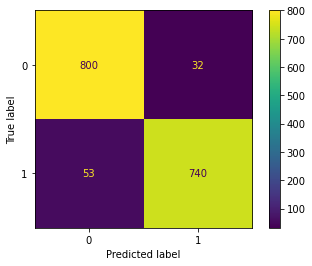

In [13]:
def draw_confusion_matrix(y_predict, model):
    cm = confusion_matrix(y_test, y_predict, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
draw_confusion_matrix(y_predict, model)

In [14]:
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       853
           1       0.93      0.96      0.95       772

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



In [15]:
param_kernel = ('linear', 'rbf', 'poly', 'sigmoid')
parameters = {'kernel':param_kernel}
model = SVC()
grid_search_svm = GridSearchCV(estimator=model, param_grid=parameters, cv=6)
grid_search_svm.fit(x_train, y_train)

GridSearchCV(cv=6, estimator=SVC(),
             param_grid={'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

In [16]:
best_model = grid_search_svm.best_estimator_
best_model.kernel

'poly'

In [17]:
svm_preds = best_model.predict(x_test)

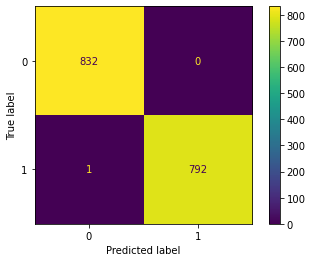

In [18]:
draw_confusion_matrix(svm_preds, best_model)

In [19]:
print(classification_report(svm_preds, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       833
           1       1.00      1.00      1.00       792

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [20]:
number_of_neighbors = np.arange(2, 11)
model_KNN = KNeighborsClassifier()
params = {"n_neighbors": number_of_neighbors}

grid_search_knn = GridSearchCV(estimator = model_KNN, param_grid=params, cv=6)

In [21]:
grid_search_knn.fit(x_train, y_train)

GridSearchCV(cv=6, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [22]:
grid_search_knn.best_score_

0.9990766389658358

In [27]:
best_model = grid_search_knn.best_estimator_
best_model

KNeighborsClassifier(n_neighbors=2)

In [24]:
knn_preds = grid_search_knn.predict(x_test)

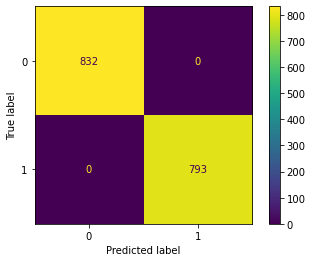

In [25]:
draw_confusion_matrix(knn_preds, best_model)

In [26]:
print(classification_report(knn_preds, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       832
           1       1.00      1.00      1.00       793

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

